# Plotting with Seaborn and Matplotlib

This gives us more control and is more expressive beyond the basic matplolib plots from a pandas dataframe or series.

Seaborn is built on top of matplotlib, but makes it more approachable for more complex visualizations

In [0]:
## update the latest seaborn (0.9.0)
!pip install seaborn==0.9.0


In [4]:
## setup our environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## pandas print columns/rows option (100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## set the styling for seaborn (white)
sns.set_style("dark")

# The Basics

There is an excellent overview at Datacamp, at the link below:

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

This will be a brief run through of that in plain english.

### **I have also added a Seaborn course on Data Camp for additional practice and study.**

In [2]:
# bring in the diamonds dataset
diamonds = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv")
diamonds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


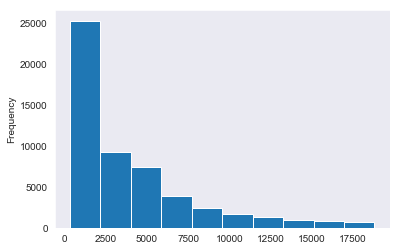

In [5]:
# we can use the basic plots from pandas for quick eda
diamonds['price'].plot(kind="hist")

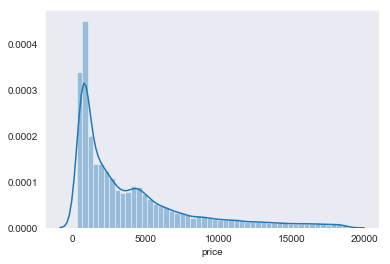

In [6]:
# Seaborn extends our EDA with stastical plot
# its a few more lines, but significant customization
sns.distplot(diamonds['price'])

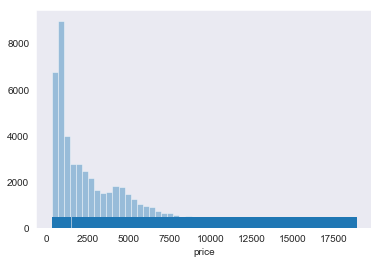

In [7]:
# we can customize it -- somereason this is getting jammed up
sns.distplot(diamonds['price'], kde=False, rug=True)

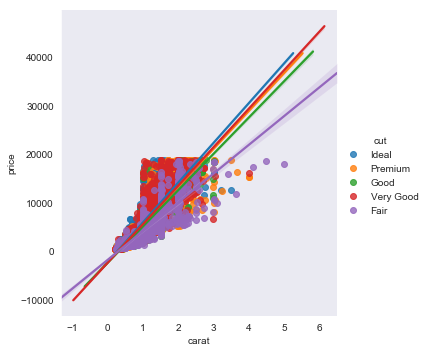

In [8]:
# lets do a regression plot, price by carat, model by cut
sns.lmplot(x="carat", y="price", data=diamonds, hue="cut")

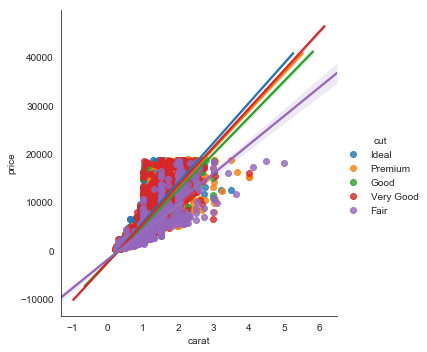

In [9]:
# we can tweak the style
sns.set_style("white")
sns.lmplot(x="carat", y="price", data=diamonds, hue="cut")

We can change the color palette

https://www.datanovia.com/en/blog/the-a-z-of-rcolorbrewer-palette/

![](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/0101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png)

And for specific colors:



![](https://python-graph-gallery.com/wp-content/uploads/100_Color_names_python-768x480.png)

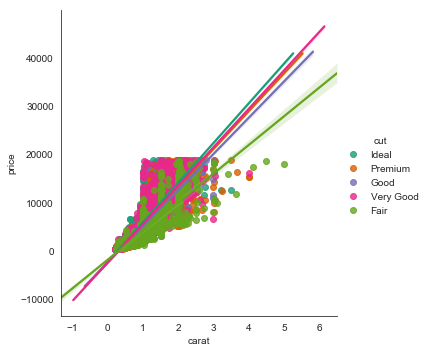

In [10]:
sns.lmplot(x="carat", y="price", data=diamonds, hue="cut", palette="Dark2")

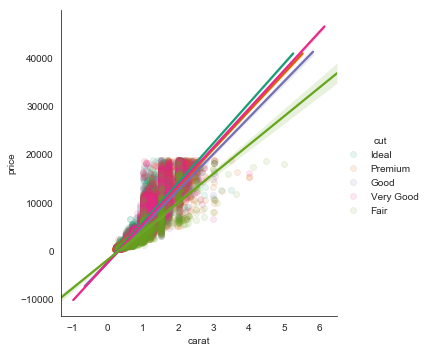

In [11]:
# even change the plot opacity (alpha) by leveraging the various keywords (kws) arguments, and passing a dictionary
sns.lmplot(x="carat", y="price", data=diamonds, hue="cut", palette="Dark2", scatter_kws={'alpha':.1})

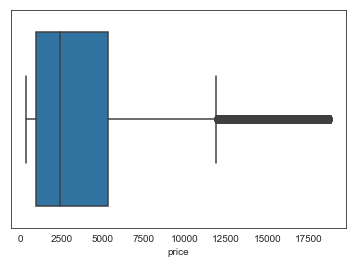

In [12]:
# There are other plots too -- boxplot
sns.boxplot(x="price", data=diamonds)

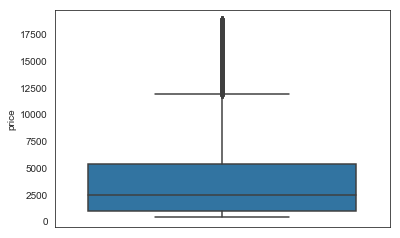

In [13]:
# we can flip it, just use y
sns.boxplot(y="price", data=diamonds)

Text(0.5, 1.0, 'My Title')

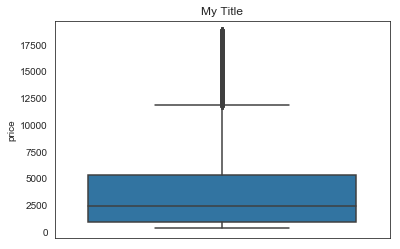

In [14]:
# there are title elements
sns.boxplot(y="price", data=diamonds).set_title("My Title")

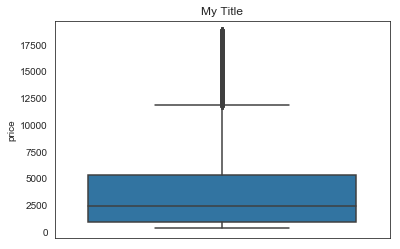

In [15]:
# but we have alot more control if we store the plot and leverage the options from matplotlib
fig = sns.boxplot(y="price", data=diamonds)
fig.set_title("My Title")
plt.show(fig)  ## we are saving the object and then using matplotlib to show the plot

In [16]:
# remember that dataframes have methods, lets look at correlation
diamonds.corr()


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


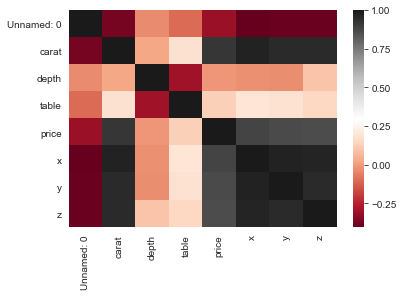

In [17]:
# we can use that for the heatmap
sns.heatmap(diamonds.corr(), cmap="RdGy")

In [19]:
# we can even build a frequency table with pandas's crosstab
cut_clarity = pd.crosstab(diamonds["cut"], diamonds["clarity"])
cut_clarity

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


In [0]:
fig = sns.heatmap(cut_clarity, cmap="Blues")
fig.set_title("My Title")
fig.set(xlabel = "Diamond Clarity")
fig.set(ylabel = "Diamond Cut")
plt.show(fig)

# Additional Resources (Reminder)

- Datacamp Course
- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
- cheatsheets on the Course site, a few seaborn related
